Part 1 - Implementation

In [68]:
import numpy as np

In [69]:
# Model Parameters
input_size = 2 # no. of features
layers = [4,3] # no. of neurons in 1st and 2nd layer
output_size = 2

In [70]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [71]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)

        model = {}

        # First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))

        # Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Third Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model

    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = np.tanh(z3)

        self.activation_outputs = (a1,a2,y_)
        return y_

    def backward(self, x, y, learning_rate=0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]

        a1, a2, y_ = self.activation_outputs

        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0) / float(m)

        delta2 = (1 - np.square(a2)) * np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0) / float(m)

        delta1 = (1 - np.square(a1)) * np.dot(delta2, W2.T)  # Fix: Use W2 instead of W3
        dw1 = np.dot(x.T, delta1)  # Fix: Use x instead of X and remove extra transpose
        db1 = np.sum(delta1, axis=0) / float(m)

        # Update the model Parameters using GD
        self.model["W1"] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1

        self.model["W2"] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2

        self.model["W3"] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3

    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        print("W1", W1.shape)
        print("A1",a1.shape)

        print("W2", W2.shape)
        print("A2",a2.shape)

        print("W3", W3.shape)
        print("Y_",y_.shape)

In [72]:
# def loss(y_oht,p):
#     l = -np.mean(y_oht*np.log(p))
#     return l

def loss(y_oht, p, epsilon=1e-10):
    p = np.clip(p, epsilon, 1 - epsilon)  # Clip p to avoid taking log of 0 or 1
    l = -np.mean(y_oht * np.log(p))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht
     

In [73]:
# xyz = np.zeros((m,depth))
# xyz[np.arange(m),y] = 1

Generating Data

In [74]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

print(X.shape)
print(Y.shape)

(500, 2)
(500,)


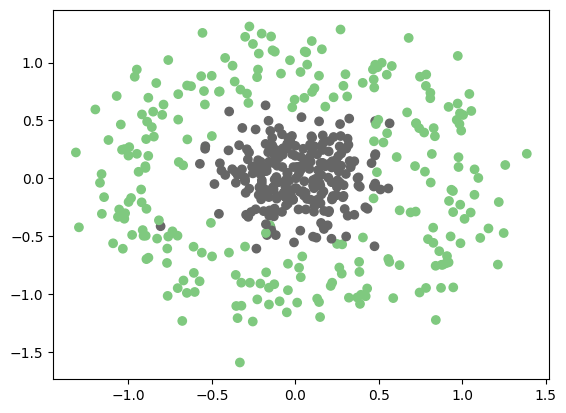

In [75]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

Training Our Model

In [76]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [77]:
model.forward(X)

array([[-0.37048793, -0.44821314],
       [-0.4112583 , -0.51024516],
       [-0.24374042, -0.50821652],
       [-0.11811192,  0.66784918],
       [-0.31627948, -0.7151039 ],
       [-0.41119434, -0.43876301],
       [-0.23039535,  0.27165819],
       [-0.50205862, -0.65767615],
       [-0.30210956, -0.53588503],
       [ 0.4761999 ,  0.82182958],
       [-0.39832258, -0.38131028],
       [ 0.14512981,  0.39128213],
       [ 0.45624974,  0.78120722],
       [-0.15574441,  0.33560185],
       [-0.38484343, -0.42885154],
       [-0.14858652,  0.24492789],
       [-0.18434665, -0.07805502],
       [ 0.12852433, -0.29672528],
       [ 0.58158597,  0.69525668],
       [ 0.47535323,  0.64053456],
       [-0.43032695, -0.39559911],
       [-0.41186014, -0.57762739],
       [ 0.39191127,  0.05279853],
       [-0.03724197, -0.55890987],
       [-0.10874818,  0.0816006 ],
       [ 0.41600157,  0.17931822],
       [-0.47597742, -0.6405306 ],
       [ 0.42146726,  0.50012217],
       [ 0.090494  ,

In [78]:
model.summary()

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
Y_ (500, 2)


In [79]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []

    classes = 2
    Y_OHT = one_hot(Y,classes)

    for ix in range(epochs):

        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)

        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
    return training_loss

In [80]:
loss = train(X,Y,model,500,0.001)

Epoch 0 Loss 6.0930
Epoch 1 Loss 5.9160
Epoch 2 Loss 6.4623
Epoch 3 Loss 5.9536
Epoch 4 Loss 6.0936
Epoch 5 Loss 5.8307
Epoch 6 Loss 5.7898
Epoch 7 Loss 5.5406
Epoch 8 Loss 5.5330
Epoch 9 Loss 5.4139
Epoch 10 Loss 5.3681
Epoch 11 Loss 5.1179
Epoch 12 Loss 4.8686
Epoch 13 Loss 4.6477
Epoch 14 Loss 4.5098
Epoch 15 Loss 4.3405
Epoch 16 Loss 4.1333
Epoch 17 Loss 3.9404
Epoch 18 Loss 3.8055
Epoch 19 Loss 3.5639
Epoch 20 Loss 3.3193
Epoch 21 Loss 3.0636
Epoch 22 Loss 2.9542
Epoch 23 Loss 2.8945
Epoch 24 Loss 2.8340
Epoch 25 Loss 2.7278
Epoch 26 Loss 2.6889
Epoch 27 Loss 2.6007
Epoch 28 Loss 2.5450
Epoch 29 Loss 2.4400
Epoch 30 Loss 2.3715
Epoch 31 Loss 2.2852
Epoch 32 Loss 2.1641
Epoch 33 Loss 2.0553
Epoch 34 Loss 1.9328
Epoch 35 Loss 1.8250
Epoch 36 Loss 1.6988
Epoch 37 Loss 1.5534
Epoch 38 Loss 1.4499
Epoch 39 Loss 1.6401
Epoch 40 Loss 2.8315
Epoch 41 Loss 4.6367
Epoch 42 Loss 4.0746
Epoch 43 Loss 4.5740
Epoch 44 Loss 2.9836
Epoch 45 Loss 1.9990
Epoch 46 Loss 2.2679
Epoch 47 Loss 1.0718
Ep